# Previsão de Vendas com Regressão Linear

In [73]:
# importando as bibliotecas
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# Carregar o Dataset de Vendas Mensais
df_vendas = pd.read_csv('../../datasets/vendas_mensais_exemplo.csv')

In [75]:
# Pré-processamento e Engenharia de Features
df_vendas['Data'] = pd.to_datetime(df_vendas['Data'])
df_vendas.set_index('Data', inplace=True)
df_vendas['Mes'] = df_vendas.index.month
df_vendas['Ano'] = df_vendas.index.year
df_vendas['Tempo_Index'] = range(1, len(df_vendas) + 1)

In [76]:
# Codifica One-Hot para variavel Mes
df_vendas = pd.get_dummies(df_vendas, columns=['Mes'], prefix='Mes')

In [77]:
# Define Features X e variavel Alvo y
features = ['Tempo_Index'] + [col for col in df_vendas.columns if col.startswith('Mes_')]
x = df_vendas[features]
y = df_vendas['Vendas']

In [78]:
# Divisão Temporal dos Dados em Treinamento e Teste
tamanho_teste = 0.2
ponto_corte = int(len(df_vendas) * (1-tamanho_teste))
X_train, X_test = x[:ponto_corte], x[ponto_corte:]
Y_train, Y_test = y[:ponto_corte], y[ponto_corte:]

In [79]:
# Treinar o Modelo de Regressão Linear
modelo_linear = LinearRegression()
modelo_linear.fit(X_train, Y_train)

LinearRegression()

In [80]:
# Faz previsões no conjunto de teste
previsoes_teste = modelo_linear.predict(X_test)

In [81]:
# Avalia o modelo (RMSE, MAE)
rmse = np.sqrt(mean_squared_error(Y_test,previsoes_teste))
mae = mean_absolute_error(Y_test, previsoes_teste)

In [82]:
print(f"RMSE no conjunto de teste: {rmse:.2f}")

RMSE no conjunto de teste: 3628.24


In [83]:
print(f"MAE no conjuto de teste: {mae: 2f}")

MAE no conjuto de teste:  2820.312500


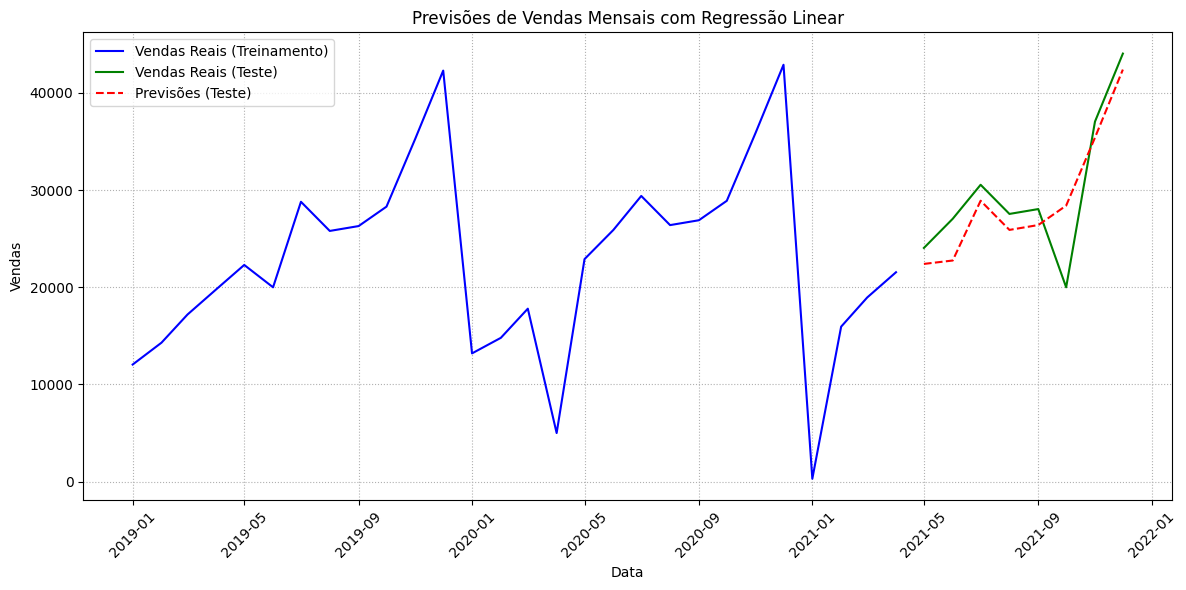

In [84]:
# Vizualizando Previsões vs Valores Reais
plt.figure(figsize=(12,6))
plt.plot(Y_train.index, Y_train, label="Vendas Reais (Treinamento)", color="blue")
plt.plot(Y_test.index, Y_test, label="Vendas Reais (Teste)", color="green")
plt.plot(Y_test.index, previsoes_teste, label="Previsões (Teste)", color="red", linestyle='--')
plt.title('Previsões de Vendas Mensais com Regressão Linear')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.legend()
plt.grid(True, linestyle=':')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()